In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv('train_churn.csv', sep = ';')

In [3]:
df

,Unnamed: 0,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,6027,Masculino,0.0,Sim,Sim,35.0,Sim,Sim,Não,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,2 Anos,Não,Transferência Bancária (Automática),25.45,809.25,0.0,0.0,0.0
1,1961,Feminino,0.0,Não,Não,42.0,Sim,Sim,DSL,NaN,...,Não,Não,1 Ano,Sim,Transferência Bancária (Automática),60.15,2421.6,0.0,0.0,0.0
2,5308,Feminino,0.0,Não,Não,69.0,Sim,Não,DSL,Sim,...,Sim,Sim,2 Anos,Sim,Cartão de Crédito (Automático),82.45,5555.3,0.0,0.0,0.0
3,3587,Masculino,1.0,Não,Não,9.0,Sim,NaN,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cartão de Crédito (Automático),99.45,919.4,0.0,0.0,1.0
4,576,Masculino,0.0,Sim,Sim,31.0,Sim,Sim,Fibra óptica,Sim,...,Sim,Não,1 Ano,Não,Transferência Bancária (Automática),98.05,3082.1,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3151,Masculino,0.0,NaN,Sim,15.0,Sim,Não,Fibra óptica,Sim,...,Não,Não,Mensal,Não,Cheque por Carta,75.10,1151.55,4.0,0.0,0.0
4996,4502,Masculino,0.0,Não,Não,55.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cheque Eletrônico,96.80,5283.95,NaN,4.0,1.0
4997,3077,Masculino,0.0,Sim,Não,45.0,Sim,Não,NaN,Sim,...,Não,Não,2 Anos,Não,Cartão de Crédito (Automático),53.30,2296.25,0.0,0.0,0.0
4998,3798,Masculino,0.0,Não,Não,42.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cheque Eletrônico,100.30,4222.95,0.0,0.0,0.0


In [4]:

colunas = df.columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")


Unique values in column 'Unnamed: 0': [6027 1961 5308 ... 3077 3798 3023]
Unique values in column 'genero': ['Masculino' 'Feminino' nan]
Unique values in column 'idoso': [ 0.  1. nan]
Unique values in column 'parceiro': ['Sim' 'Não' nan]
Unique values in column 'dependentes': ['Sim' 'Não' nan]
Unique values in column 'tempoDeServico': [  35.   42.   69.    9.   31.   54.   -2.    1.   34.   12.   47.   26.
   25.   23.   38.   50.   59.   20.   45.   64.   65.    4.   46.   33.
   41.   72.   nan   21.   68.   40.   55.   56.    6.   19.    2.   18.
   53.   94.   15.   58.   32.   51.    7.   30.   61.   43.   70.   62.
   22.   16.   57.   14.   63.   39.   10.   60.   17.   48.   71.   36.
   37.  -82.   13.    8.  -39.   67.    3.    5.   49.   24.  113.   11.
  116.  110.   44.   28.   89.   66.   29.   92.   27.  -38.  147.  130.
 -111.   52.  -59.  129.  151.  118.   77.  -92.   80.  -97.  -14.  -69.
  -94.   -9.   -8.   78.  -28.    0.   75.  -93.  -49.  -66.  -48.  190.
  -71.

In [5]:
df.isna().sum() 

Unnamed: 0                 0
genero                   241
idoso                    265
parceiro                 238
dependentes              234
tempoDeServico           253
ServicoTelefone          211
MultiLinhas              255
ServicoInternet          229
ServicoSegurancaCyber    222
ServicoBackup            263
SeguroDispositivos       250
ServicoSuporteTecnico    233
StreamingTV              249
StreamingFilmes          225
Contrato                 262
BillingDigital           238
MetodoPagamento          244
FaturaMensal             274
FaturaTotal              238
NumTickets               269
NumTicketsTecnico        255
Churn                    264
dtype: int64

In [6]:
# procurando linhas onde a coluna parceiro é vazio
missing_rows = df[df['parceiro'].isna()]

# loop pra achar 
for index, row in missing_rows.iterrows():
    # achando linhas similares 
    similar_rows = df[(df['parceiro'].notna()) & (df['parceiro'] == row['parceiro'])]
    
    # loop pra checar
    if len(similar_rows) > 0:
        # colocando com a moda dos valores parecidos
        most_common_value = similar_rows['parceiro'].mode().values[0]
        df.at[index, 'parceiro'] = most_common_value


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5000 non-null   int64  
 1   genero                 4759 non-null   object 
 2   idoso                  4735 non-null   float64
 3   parceiro               4762 non-null   object 
 4   dependentes            4766 non-null   object 
 5   tempoDeServico         4747 non-null   float64
 6   ServicoTelefone        4789 non-null   object 
 7   MultiLinhas            4745 non-null   object 
 8   ServicoInternet        4771 non-null   object 
 9   ServicoSegurancaCyber  4778 non-null   object 
 10  ServicoBackup          4737 non-null   object 
 11  SeguroDispositivos     4750 non-null   object 
 12  ServicoSuporteTecnico  4767 non-null   object 
 13  StreamingTV            4751 non-null   object 
 14  StreamingFilmes        4775 non-null   object 
 15  Cont

In [8]:
# Identificar clientes com os serviços de streaming ativados
clientes_com_streaming = df[(df['StreamingTV'] == 'Sim') & (df['StreamingFilmes'] == 'Sim')]

# Calcular a média das faturas mensais dos clientes com streaming
media_fatura_streaming = clientes_com_streaming['FaturaMensal'].mean()

print("Média das faturas mensais dos clientes com streaming:", media_fatura_streaming)


Média das faturas mensais dos clientes com streaming: 93.70528317836009


In [9]:
# Preencher os valores ausentes na coluna FaturaMensal com a média do streaming
df['FaturaMensal'].fillna(media_fatura_streaming, inplace=True)

# Verificar se os valores ausentes foram preenchidos corretamente
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5000 non-null   int64  
 1   genero                 4759 non-null   object 
 2   idoso                  4735 non-null   float64
 3   parceiro               4762 non-null   object 
 4   dependentes            4766 non-null   object 
 5   tempoDeServico         4747 non-null   float64
 6   ServicoTelefone        4789 non-null   object 
 7   MultiLinhas            4745 non-null   object 
 8   ServicoInternet        4771 non-null   object 
 9   ServicoSegurancaCyber  4778 non-null   object 
 10  ServicoBackup          4737 non-null   object 
 11  SeguroDispositivos     4750 non-null   object 
 12  ServicoSuporteTecnico  4767 non-null   object 
 13  StreamingTV            4751 non-null   object 
 14  StreamingFilmes        4775 non-null   object 
 15  Cont

In [10]:
df['FaturaTotal'] = pd.to_numeric(df['FaturaTotal'], errors='coerce')

In [11]:
# Preencher valores ausentes na coluna "genero" com a moda (valor mais frequente)
valor_mais_frequente_genero = df['genero'].mode()[0]
df['genero'].fillna(valor_mais_frequente_genero, inplace=True)

# Preencher valores ausentes na coluna "idoso" com a mediana
mediana_idoso = df['idoso'].median()
df['idoso'].fillna(mediana_idoso, inplace=True)

# Preencher valores ausentes nas colunas de serviços com 'Não' para indicar que o serviço não está ativado
colunas_servicos = ['ServicoTelefone', 'MultiLinhas', 'ServicoInternet', 'ServicoSegurancaCyber', 'ServicoBackup', 
                    'SeguroDispositivos', 'ServicoSuporteTecnico', 'StreamingTV', 'StreamingFilmes']

# Preencher valores ausentes na coluna "Contrato" com a moda
contrato_mais_frequente = df['Contrato'].mode()[0]
df['Contrato'].fillna(contrato_mais_frequente, inplace=True)

# Preencher valores ausentes na coluna "BillingDigital" com 'Não' para indicar que o cliente não usa fatura digital
df['BillingDigital'].fillna('Não', inplace=True)

# Preencher valores ausentes na coluna "MetodoPagamento" com 'Cartão de Crédito (Automático)' como um método comum
df['MetodoPagamento'].fillna('Cartão de Crédito (Automático)', inplace=True)

# Preencher valores ausentes na coluna "FaturaTotal" com a média dos valores existentes
media_fatura_total = df['FaturaTotal'].astype(float).mean()
df['FaturaTotal'].fillna((media_fatura_total), inplace=True)

# Preencher valores ausentes nas colunas de contagem de tickets com 0, assumindo que nenhum ticket foi registrado
colunas_tickets = ['NumTickets', 'NumTicketsTecnico']
df[colunas_tickets] = df[colunas_tickets].fillna(0)

# Calcular a moda da coluna "parceiro" para grupos de clientes com faixas semelhantes de fatura mensal
bins_fatura_mensal = pd.cut(df['FaturaMensal'], bins=10)  # Dividir os clientes em 10 faixas de fatura mensal
moda_por_faixa = df.groupby(bins_fatura_mensal)['parceiro'].apply(lambda x: x.mode()[0])
# Mapear a moda de volta para os clientes com base na fatura mensal
df['parceiro'] = df['parceiro'].fillna(df['FaturaMensal'].map(lambda x: moda_por_faixa.loc[x]))

# Calcular a moda da coluna "dependentes" para grupos de clientes com faixas semelhantes de fatura mensal
moda_por_faixa_dependentes = df.groupby(bins_fatura_mensal)['dependentes'].apply(lambda x: x.mode()[0])
# Mapear a moda de volta para os clientes com base na fatura mensal
df['dependentes'] = df['dependentes'].fillna(df['FaturaMensal'].map(lambda x: moda_por_faixa_dependentes.loc[x]))

# Preencher valores ausentes na coluna "tempoDeServico" com a mediana do tempo de serviço
mediana_tempo_servico = df['tempoDeServico'].median()
df['tempoDeServico'].fillna(mediana_tempo_servico, inplace=True)

# Calcular a moda de cada serviço para grupos de clientes com faixas semelhantes de fatura mensal
for coluna_servico in colunas_servicos:
    moda_por_faixa = df.groupby(bins_fatura_mensal)[coluna_servico].apply(lambda x: x.mode()[0])
    # Mapear a moda de volta para os clientes com base na fatura mensal
    df[coluna_servico] = df[coluna_servico].fillna(df['FaturaMensal'].map(lambda x: moda_por_faixa.loc[x]))


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             5000 non-null   int64  
 1   genero                 5000 non-null   object 
 2   idoso                  5000 non-null   float64
 3   parceiro               5000 non-null   object 
 4   dependentes            5000 non-null   object 
 5   tempoDeServico         5000 non-null   float64
 6   ServicoTelefone        5000 non-null   object 
 7   MultiLinhas            5000 non-null   object 
 8   ServicoInternet        5000 non-null   object 
 9   ServicoSegurancaCyber  5000 non-null   object 
 10  ServicoBackup          5000 non-null   object 
 11  SeguroDispositivos     5000 non-null   object 
 12  ServicoSuporteTecnico  5000 non-null   object 
 13  StreamingTV            5000 non-null   object 
 14  StreamingFilmes        5000 non-null   object 
 15  Cont

In [13]:
# Remover linhas onde o valor na coluna "Churn" é NaN
df.dropna(subset=['Churn'], inplace=True)

# Verificar se as linhas foram removidas corretamente
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 4736 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             4736 non-null   int64  
 1   genero                 4736 non-null   object 
 2   idoso                  4736 non-null   float64
 3   parceiro               4736 non-null   object 
 4   dependentes            4736 non-null   object 
 5   tempoDeServico         4736 non-null   float64
 6   ServicoTelefone        4736 non-null   object 
 7   MultiLinhas            4736 non-null   object 
 8   ServicoInternet        4736 non-null   object 
 9   ServicoSegurancaCyber  4736 non-null   object 
 10  ServicoBackup          4736 non-null   object 
 11  SeguroDispositivos     4736 non-null   object 
 12  ServicoSuporteTecnico  4736 non-null   object 
 13  StreamingTV            4736 non-null   object 
 14  StreamingFilmes        4736 non-null   object 
 15  Contrato 

In [14]:
display(df)

,Unnamed: 0,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoInternet,ServicoSegurancaCyber,...,StreamingTV,StreamingFilmes,Contrato,BillingDigital,MetodoPagamento,FaturaMensal,FaturaTotal,NumTickets,NumTicketsTecnico,Churn
0,6027,Masculino,0.0,Sim,Sim,35.0,Sim,Sim,Não,Sem serviço de internet,...,Sem serviço de internet,Sem serviço de internet,2 Anos,Não,Transferência Bancária (Automática),25.45,809.25,0.0,0.0,0.0
1,1961,Feminino,0.0,Não,Não,42.0,Sim,Sim,DSL,Não,...,Não,Não,1 Ano,Sim,Transferência Bancária (Automática),60.15,2421.60,0.0,0.0,0.0
2,5308,Feminino,0.0,Não,Não,69.0,Sim,Não,DSL,Sim,...,Sim,Sim,2 Anos,Sim,Cartão de Crédito (Automático),82.45,5555.30,0.0,0.0,0.0
3,3587,Masculino,1.0,Não,Não,9.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cartão de Crédito (Automático),99.45,919.40,0.0,0.0,1.0
4,576,Masculino,0.0,Sim,Sim,31.0,Sim,Sim,Fibra óptica,Sim,...,Sim,Não,1 Ano,Não,Transferência Bancária (Automática),98.05,3082.10,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3151,Masculino,0.0,Não,Sim,15.0,Sim,Não,Fibra óptica,Sim,...,Não,Não,Mensal,Não,Cheque por Carta,75.10,1151.55,4.0,0.0,0.0
4996,4502,Masculino,0.0,Não,Não,55.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cheque Eletrônico,96.80,5283.95,0.0,4.0,1.0
4997,3077,Masculino,0.0,Sim,Não,45.0,Sim,Não,DSL,Sim,...,Não,Não,2 Anos,Não,Cartão de Crédito (Automático),53.30,2296.25,0.0,0.0,0.0
4998,3798,Masculino,0.0,Não,Não,42.0,Sim,Sim,Fibra óptica,Não,...,Sim,Sim,Mensal,Sim,Cheque Eletrônico,100.30,4222.95,0.0,0.0,0.0


In [15]:
df = df.drop(columns=['Unnamed: 0', 'NumTickets', 'NumTicketsTecnico'])

In [16]:
df.columns

Index(['genero', 'idoso', 'parceiro', 'dependentes', 'tempoDeServico',
       'ServicoTelefone', 'MultiLinhas', 'ServicoInternet',
       'ServicoSegurancaCyber', 'ServicoBackup', 'SeguroDispositivos',
       'ServicoSuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'Contrato',
       'BillingDigital', 'MetodoPagamento', 'FaturaMensal', 'FaturaTotal',
       'Churn'],
      dtype='object')

In [17]:
df.nunique()

genero                      2
idoso                       2
parceiro                    2
dependentes                 2
tempoDeServico            191
ServicoTelefone             2
MultiLinhas                 3
ServicoInternet             3
ServicoSegurancaCyber       3
ServicoBackup               3
SeguroDispositivos          3
ServicoSuporteTecnico       3
StreamingTV                 3
StreamingFilmes             3
Contrato                    3
BillingDigital              2
MetodoPagamento             4
FaturaMensal             1509
FaturaTotal              4258
Churn                       2
dtype: int64

In [18]:
def filtrar_categoricas(dataframe):
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns
    numeric_columns = dataframe.select_dtypes(include=['number']).columns
    return categorical_columns, numeric_columns

#
categorical_cols, numeric_cols = filtrar_categoricas(df)

print("Categorics:")
print(categorical_cols)
print("\nNumerics:")
print(numeric_cols)

Categorics:
Index(['genero', 'parceiro', 'dependentes', 'ServicoTelefone', 'MultiLinhas',
       'ServicoInternet', 'ServicoSegurancaCyber', 'ServicoBackup',
       'SeguroDispositivos', 'ServicoSuporteTecnico', 'StreamingTV',
       'StreamingFilmes', 'Contrato', 'BillingDigital', 'MetodoPagamento'],
      dtype='object')

Numerics:
Index(['idoso', 'tempoDeServico', 'FaturaMensal', 'FaturaTotal', 'Churn'], dtype='object')


In [19]:
for feature in df[categorical_cols]:
        print(f'{feature}: {df[feature].unique()}')

genero: ['Masculino' 'Feminino']
parceiro: ['Sim' 'Não']
dependentes: ['Sim' 'Não']
ServicoTelefone: ['Sim' 'Não']
MultiLinhas: ['Sim' 'Não' 'Sem serviço de telefone']
ServicoInternet: ['Não' 'DSL' 'Fibra óptica']
ServicoSegurancaCyber: ['Sem serviço de internet' 'Não' 'Sim']
ServicoBackup: ['Sem serviço de internet' 'Sim' 'Não']
SeguroDispositivos: ['Sem serviço de internet' 'Não' 'Sim']
ServicoSuporteTecnico: ['Sem serviço de internet' 'Não' 'Sim']
StreamingTV: ['Sem serviço de internet' 'Não' 'Sim']
StreamingFilmes: ['Sem serviço de internet' 'Não' 'Sim']
Contrato: ['2 Anos' '1 Ano' 'Mensal']
BillingDigital: ['Não' 'Sim']
MetodoPagamento: ['Transferência Bancária (Automática)' 'Cartão de Crédito (Automático)'
 'Cheque Eletrônico' 'Cheque por Carta']


In [20]:
df['MultiLinhas'] = df['MultiLinhas'].replace('Sem serviço de telefone','Não')

columns_to_replace = ['ServicoSegurancaCyber', 'ServicoBackup', 'SeguroDispositivos', 'ServicoSuporteTecnico', 'StreamingTV', 'StreamingFilmes']

#Aqui é o seguinte, o (sem servico e o nao) servem pra falar a mesma coisa, entao vamos substituir
for column in columns_to_replace:
    df[column] = df[column].replace('Sem serviço de internet', 'Não')

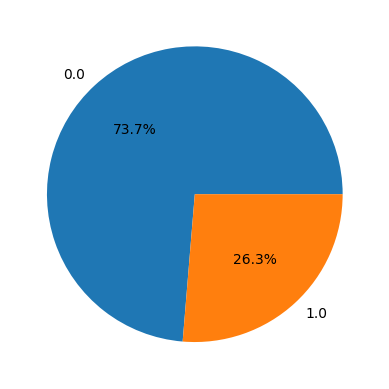

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

churn_counts= df['Churn'].value_counts()
fig2 = plt.pie(x=churn_counts.values, labels=churn_counts.keys(), autopct='%1.1f%%')


In [22]:
df['tempoDeServico'] = df['tempoDeServico'].abs()


In [23]:
colunas = df.columns
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'genero': ['Masculino' 'Feminino']
Unique values in column 'idoso': [0. 1.]
Unique values in column 'parceiro': ['Sim' 'Não']
Unique values in column 'dependentes': ['Sim' 'Não']
Unique values in column 'tempoDeServico': [ 35.  42.  69.   9.  31.  54.   2.   1.  34.  12.  47.  26.  25.  23.
  38.  50.  20.  45.  64.  65.   4.  46.  33.  41.  72.  29.  21.  68.
  40.  55.  56.   6.  19.  18.  53.  94.  15.  58.  32.  51.   7.  30.
  61.  43.  70.  22.  16.  57.  14.  59.  63.  39.  10.  60.  17.  48.
  71.  36.  37.  82.  13.   8.  67.   3.   5.  24. 113.  11. 116. 110.
  44.  28.  89.  66.  49.  92.  27. 147. 130. 111.  62.  52. 129. 151.
 118.  77.  80.  97.  78.   0.  75.  93. 190. 124. 106. 141. 166.  91.
 188. 161. 137.  83. 123. 180.  76.  87. 108. 135.  95. 112.  81.  73.
 109. 153.  74. 131.  90. 143. 120. 100.  99. 155. 160. 102. 146. 142.
 122. 114. 163. 105. 115. 127. 107. 183. 154.]
Unique values in column 'ServicoTelefone': ['Sim' 'Não']
Unique value

In [24]:
sim_nao_cols = ['parceiro', 'dependentes', 'ServicoTelefone', 'MultiLinhas', 'ServicoSegurancaCyber', 'ServicoBackup', 'SeguroDispositivos', 'ServicoSuporteTecnico', 'StreamingTV', 'StreamingFilmes', 'BillingDigital']
for col in sim_nao_cols:
    df[col] = df[col].map({'Sim': 1, 'Não': 0})

In [25]:
# Mapear 'Masculino' para 0 e 'Feminino' para 1 na coluna 'genero'
df['genero'] = df['genero'].map({'Masculino': 0, 'Feminino': 1})

In [26]:

# Substituir 0.0 por 0 e 1.0 por 1 nas colunas 'idoso' e 'Churn'
df['idoso'] = df['idoso'].astype(int)
df['Churn'] = df['Churn'].astype(int)


In [27]:
from sklearn.preprocessing import OneHotEncoder

# Colunas que precisam de codificação one-hot
columns_to_encode = ['ServicoInternet', 'Contrato', 'MetodoPagamento']

# Aplicando a codificação one-hot para as colunas selecionadas
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_data = encoder.fit_transform(df[columns_to_encode])

In [28]:
new_columns = encoder.get_feature_names_out(columns_to_encode)

# Atualizando o DataFrame original com as novas colunas codificadas
df[new_columns] = encoded_data

# Removendo as colunas originais que foram codificadas
df.drop(columns=columns_to_encode, inplace=True)

In [29]:
from sklearn.preprocessing import MinMaxScaler

# Colunas numéricas que precisam ser dimensionadas
columns_to_scale = ['tempoDeServico', 'FaturaMensal', 'FaturaTotal']

# Criando um escalonador MinMaxScaler
scaler = MinMaxScaler()

# Aplicando o escalonamento nas colunas selecionadas
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Exibindo as primeiras linhas do DataFrame com as colunas escalonadas
df


,genero,idoso,parceiro,dependentes,tempoDeServico,ServicoTelefone,MultiLinhas,ServicoSegurancaCyber,ServicoBackup,SeguroDispositivos,...,FaturaMensal,FaturaTotal,Churn,ServicoInternet_Fibra óptica,ServicoInternet_Não,Contrato_2 Anos,Contrato_Mensal,MetodoPagamento_Cheque Eletrônico,MetodoPagamento_Cheque por Carta,MetodoPagamento_Transferência Bancária (Automática)
0,0,0,1,1,0.184211,1,1,0,0,0,...,0.407620,0.091338,0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
1,1,0,0,0,0.221053,1,1,0,1,0,...,0.500401,0.277659,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1,0,0,0,0.363158,1,0,1,0,1,...,0.560027,0.639786,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0.047368,1,1,0,1,0,...,0.605481,0.104067,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,0,1,1,0.163158,1,1,1,0,1,...,0.601738,0.353986,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,0,0,1,0.078947,1,0,1,0,0,...,0.540374,0.130894,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4996,0,0,0,0,0.289474,1,1,0,0,0,...,0.598396,0.608429,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4997,0,0,1,0,0.236842,1,0,1,0,1,...,0.482086,0.263174,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4998,0,0,0,0,0.221053,1,1,0,0,0,...,0.607754,0.485821,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Dividir os dados em conjuntos de treinamento e teste
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# Definindo os parâmetros para busca em grade
param_grid_catboost = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [4, 6, 8],
    'iterations': [50, 100, 150],
    'subsample': [0.8, 0.9, 1.0]
}

# Inicializando o modelo
catboost = CatBoostClassifier()

# Criando o objeto GridSearchCV
grid_search_catboost = GridSearchCV(catboost, param_grid=param_grid_catboost, cv=5, scoring='accuracy')

# Treinando o modelo
grid_search_catboost.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros encontrados para o CatBoost:")
print(grid_search_catboost.best_params_)

# Melhor score encontrado
print("Melhor score encontrado para o CatBoost:")
print(grid_search_catboost.best_score_)


0:	learn: 0.6868570	total: 214ms	remaining: 10.5s
1:	learn: 0.6805177	total: 217ms	remaining: 5.22s
2:	learn: 0.6745345	total: 222ms	remaining: 3.48s
3:	learn: 0.6690009	total: 225ms	remaining: 2.59s
4:	learn: 0.6639979	total: 229ms	remaining: 2.06s
5:	learn: 0.6583725	total: 232ms	remaining: 1.7s
6:	learn: 0.6529046	total: 235ms	remaining: 1.45s
7:	learn: 0.6476541	total: 239ms	remaining: 1.26s
8:	learn: 0.6425226	total: 243ms	remaining: 1.11s
9:	learn: 0.6375454	total: 246ms	remaining: 984ms
10:	learn: 0.6334543	total: 249ms	remaining: 884ms
11:	learn: 0.6293693	total: 257ms	remaining: 813ms
12:	learn: 0.6251467	total: 260ms	remaining: 741ms
13:	learn: 0.6203133	total: 265ms	remaining: 682ms
14:	learn: 0.6162091	total: 271ms	remaining: 632ms
15:	learn: 0.6117748	total: 274ms	remaining: 582ms
16:	learn: 0.6077018	total: 277ms	remaining: 538ms
17:	learn: 0.6036028	total: 290ms	remaining: 516ms
18:	learn: 0.6001411	total: 294ms	remaining: 480ms
19:	learn: 0.5963683	total: 298ms	remainin

In [32]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Definindo o classificador XGBoost
xgb_classifier = XGBClassifier()

# Definindo a grade de hiperparâmetros
param_grid_xgb = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200]
}

# Realizando Grid Search
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Melhores hiperparâmetros encontrados para o XGBoost:")
print(best_params_xgb)
print("Melhor score encontrado para o XGBoost:")
print(best_score_xgb)


Melhores hiperparâmetros encontrados para o XGBoost:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Melhor score encontrado para o XGBoost:
0.7991031812145568


In [33]:
from sklearn.linear_model import LogisticRegression

# Definindo o classificador de Regressão Logística
logistic_classifier = LogisticRegression()

# Definindo a grade de hiperparâmetros
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Realizando Grid Search
grid_search_logistic = GridSearchCV(estimator=logistic_classifier, param_grid=param_grid_logistic, cv=5, scoring='accuracy')
grid_search_logistic.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
best_params_logistic = grid_search_logistic.best_params_
best_score_logistic = grid_search_logistic.best_score_

print("Melhores hiperparâmetros encontrados para a Regressão Logística:")
print(best_params_logistic)
print("Melhor score encontrado para a Regressão Logística:")
print(best_score_logistic)


Melhores hiperparâmetros encontrados para a Regressão Logística:
{'C': 0.1, 'penalty': 'l2'}
Melhor score encontrado para a Regressão Logística:
0.7943538408451636


In [34]:
from sklearn.svm import SVC

# Definindo o classificador SVM
svm_classifier = SVC()

# Definindo a grade de hiperparâmetros
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly', 'sigmoid']
}

# Realizando Grid Search
grid_search_svm = GridSearchCV(estimator=svm_classifier, param_grid=param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Melhores hiperparâmetros encontrados para o SVM:")
print(best_params_svm)
print("Melhor score encontrado para o SVM:")
print(best_score_svm)


Melhores hiperparâmetros encontrados para o SVM:
{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid'}
Melhor score encontrado para o SVM:
0.7948832880799434


In [35]:
from sklearn.ensemble import RandomForestClassifier

# Definindo o classificador RandomForest
rf_classifier = RandomForestClassifier()

# Definindo a grade de hiperparâmetros
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Realizando Grid Search
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)

# Melhores hiperparâmetros encontrados
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Melhores hiperparâmetros encontrados para o RandomForest:")
print(best_params_rf)
print("Melhor score encontrado para o RandomForest:")
print(best_score_rf)


Melhores hiperparâmetros encontrados para o RandomForest:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Melhor score encontrado para o RandomForest:
0.8009484041644737


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Dividir os dados em conjuntos de treinamento e teste
X = df.drop(columns=['Churn'])
y = df['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Definir os modelos com os melhores hiperparâmetros encontrados
models = [
    ('CatBoost', CatBoostClassifier(depth=4, iterations=50, learning_rate=0.1, subsample=0.9, verbose=0)),
    ('XGBoost', XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=50)),
    ('Logistic Regression', LogisticRegression(C=0.1, penalty='l2', max_iter=1000)),
    ('SVM', SVC(C=10, gamma=0.01, kernel='sigmoid')),
    ('Random Forest', RandomForestClassifier(max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50))
]

# Treinar e avaliar os modelos
for name, model in models:
    pipeline = Pipeline(steps=[('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    print(f"\n{name}:")
    print(classification_report(y_test, y_pred))



CatBoost:
              precision    recall  f1-score   support

           0       0.83      0.90      0.87       699
           1       0.64      0.49      0.56       249

    accuracy                           0.79       948
   macro avg       0.74      0.70      0.71       948
weighted avg       0.78      0.79      0.79       948


XGBoost:
              precision    recall  f1-score   support

           0       0.83      0.89      0.85       699
           1       0.60      0.48      0.53       249

    accuracy                           0.78       948
   macro avg       0.71      0.68      0.69       948
weighted avg       0.77      0.78      0.77       948


Logistic Regression:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       699
           1       0.61      0.48      0.53       249

    accuracy                           0.78       948
   macro avg       0.72      0.68      0.70       948
weighted avg       0.77      0.

CatBoost (Treinamento):
Precision: 0.71898355754858
Recall: 0.48244734202607825
F1-score: 0.5774309723889556
Acurácia: 0.8141499472016895
Matriz de Confusão (Treinamento):
[[2603  188]
 [ 516  481]]


XGBoost (Treinamento):
Precision: 0.7083926031294452
Recall: 0.49949849548645936
F1-score: 0.5858823529411764
Acurácia: 0.8141499472016895
Matriz de Confusão (Treinamento):
[[2586  205]
 [ 499  498]]


Logistic Regression (Treinamento):
Precision: 0.6491228070175439
Recall: 0.48244734202607825
F1-score: 0.5535097813578828
Acurácia: 0.795142555438226
Matriz de Confusão (Treinamento):
[[2531  260]
 [ 516  481]]


SVM (Treinamento):
Precision: 0.6452020202020202
Recall: 0.5125376128385155
F1-score: 0.5712688652878702
Acurácia: 0.7975184794086589
Matriz de Confusão (Treinamento):
[[2510  281]
 [ 486  511]]


Random Forest (Treinamento):
Precision: 0.8249336870026526
Recall: 0.6238716148445336
F1-score: 0.7104511707595661
Acurácia: 0.866156282998944
Matriz de Confusão (Treinamento):
[[2659  13

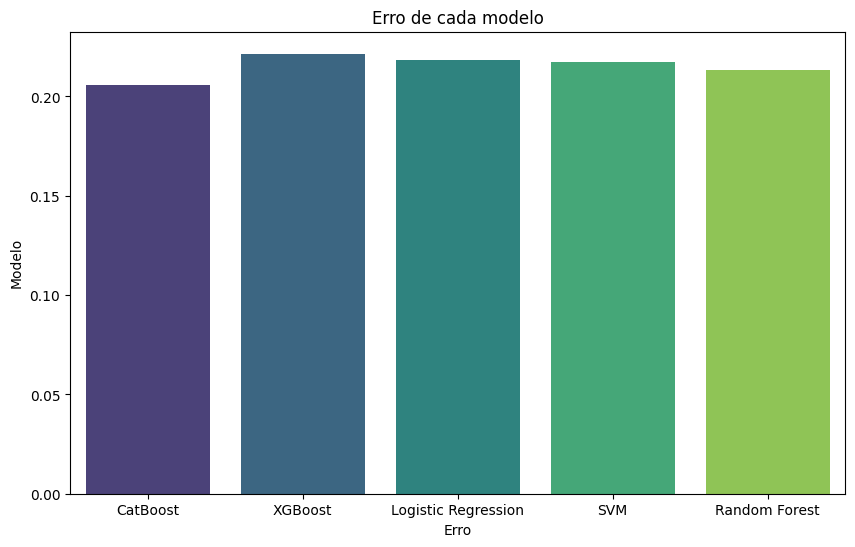

CatBoost:
Precision (Teste): 0.640625
Recall (Teste): 0.4939759036144578
F1-score (Teste): 0.5578231292517006
Acurácia (Teste): 0.7943037974683544
Matriz de Confusão (Teste):
[[630  69]
 [126 123]]


XGBoost:
Precision (Teste): 0.5979899497487438
Recall (Teste): 0.4779116465863454
F1-score (Teste): 0.53125
Acurácia (Teste): 0.7784810126582279
Matriz de Confusão (Teste):
[[619  80]
 [130 119]]


Logistic Regression:
Precision (Teste): 0.6071428571428571
Recall (Teste): 0.4779116465863454
F1-score (Teste): 0.5348314606741573
Acurácia (Teste): 0.7816455696202531
Matriz de Confusão (Teste):
[[622  77]
 [130 119]]


SVM:
Precision (Teste): 0.6048780487804878
Recall (Teste): 0.4979919678714859
F1-score (Teste): 0.5462555066079294
Acurácia (Teste): 0.7827004219409283
Matriz de Confusão (Teste):
[[618  81]
 [125 124]]


Random Forest:
Precision (Teste): 0.6192893401015228
Recall (Teste): 0.4899598393574297
F1-score (Teste): 0.547085201793722
Acurácia (Teste): 0.7869198312236287
Matriz de Confu

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Definir listas vazias para armazenar as métricas
nomes_modelos = []
erros = []
precision = []
recall = []
f1 = []
acuracia = []
matrizes_confusao = []

# Treinar e avaliar os modelos
for nome, modelo in models:
    pipeline = Pipeline(steps=[('classificador', modelo)])
    pipeline.fit(X_train, y_train)
    y_predito = pipeline.predict(X_test)
    
    # Calcular métricas para o teste
    nomes_modelos.append(nome)
    erros.append(1 - accuracy_score(y_test, y_predito))
    precision.append(precision_score(y_test, y_predito))
    recall.append(recall_score(y_test, y_predito))
    f1.append(f1_score(y_test, y_predito))
    acuracia.append(accuracy_score(y_test, y_predito))
    matrizes_confusao.append(confusion_matrix(y_test, y_predito))

    # Calcular métricas para o treinamento
    y_predito_train = pipeline.predict(X_train)
    print(f"{nome} (Treinamento):")
    print("Precision:", precision_score(y_train, y_predito_train))
    print("Recall:", recall_score(y_train, y_predito_train))
    print("F1-score:", f1_score(y_train, y_predito_train))
    print("Acurácia:", accuracy_score(y_train, y_predito_train))
    print("Matriz de Confusão (Treinamento):")
    print(confusion_matrix(y_train, y_predito_train))
    print("\n")

# Plotar gráfico de barras do erro de cada modelo
plt.figure(figsize=(10, 6))
sns.barplot(x=nomes_modelos, y=erros, palette='viridis')
plt.xlabel('Erro')
plt.ylabel('Modelo')
plt.title('Erro de cada modelo')
plt.show()

# Imprimir métricas de cada modelo para o teste
for i in range(len(nomes_modelos)):
    print(f"{nomes_modelos[i]}:")
    print("Precision (Teste):", precision[i])
    print("Recall (Teste):", recall[i])
    print("F1-score (Teste):", f1[i])
    print("Acurácia (Teste):", acuracia[i])
    print("Matriz de Confusão (Teste):")
    print(matrizes_confusao[i])
    print("\n")


Modelo Escolhido CatBoost, apesar de todos os outros modelos pos gridsearchs terem boas metricas, ele foi o que obteve melhor resultado


Analisando o caso especifico de Churn, preciso melhorar o Recall, ja que é a metrica que analisa falso negativos
nesse caso, eu dizer que um cliente nao vai da churn e ele da churn acaba comigo

Uma abordagem comum para lidar com desbalanceamento de classes, como é o caso do churn, é ajustar o parâmetro scale_pos_weight, que aumenta o peso das classes positivas durante o treinamento. Isso pode ajudar o modelo a se concentrar mais em identificar corretamente os casos de churn.

Vamos realizar um novo grid search para encontrar os melhores hiperparâmetros para o CatBoost, incluindo o scale_pos_weight, e então avaliar o desempenho do modelo com os novos hiperparâmetros.

Teste Empirico X Teste Estrutural

CatBoost (Treinamento):
Precision: 0.71898355754858
Recall: 0.48244734202607825
F1-score: 0.5774309723889556
Acurácia: 0.8141499472016895

CatBoost:
Precision (Teste): 0.640625
Recall (Teste): 0.4939759036144578
F1-score (Teste): 0.5578231292517006
Acurácia (Teste): 0.7943037974683544
Matriz de Confusão (Teste):

No que vimos previamente o risco empirico do catboost, ele esta perdendo mais no teste do que no treino, pouca coisa o que é simples de se lidar, e posteriormente eu concerto e penaliso mais o recall e concerto o precision que pra esse caso de Churn importam muito mais que a falsa ideia de uma alta acurácia, no teste empirico o modelo passou, nao apresenta overfitting nem underfitting

Para esse problema de Classificação Binária o risco estrutural o catboost é muito bom também, por ser um modelo e boosting ele acaba generalizando bem para dados novos, ja que não esta overfitando mesmo com a busca de melhores parametros, mais abaixo tem o teste de bias-variance que eu explico melhor como ele tenderia a overfitar se eu deixasse o numero de arvores maior

Aqui eu to procurando os melhores parametros novamente porem penalizando o recall

In [38]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier

# Definir os parâmetros para o grid search
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.3],
    'iterations': [50, 100, 200],
    'scale_pos_weight': [1, 2, 5]
}

# Criar o modelo CatBoost
catboost = CatBoostClassifier(verbose=0)

# Realizar o grid search
grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Imprimir os melhores hiperparâmetros e score encontrado
print("Melhores hiperparâmetros encontrados para o CatBoost:")
print(grid_search.best_params_)
print("Melhor score encontrado para o CatBoost:")
print(grid_search.best_score_)

Melhores hiperparâmetros encontrados para o CatBoost:
{'depth': 4, 'iterations': 100, 'learning_rate': 0.01, 'scale_pos_weight': 5}
Melhor score encontrado para o CatBoost:
0.9067035175879397


In [39]:
# Treinar o modelo CatBoost com os melhores hiperparâmetros encontrados
best_catboost = CatBoostClassifier(depth=4, iterations=100, learning_rate=0.01, scale_pos_weight=5, verbose=0)
best_catboost.fit(X_train, y_train)

# Avaliar o modelo
y_pred_catboost = best_catboost.predict(X_test)
print("CatBoost com melhores hiperparâmetros:")
print(classification_report(y_test, y_pred_catboost))



CatBoost com melhores hiperparâmetros:
              precision    recall  f1-score   support

           0       0.94      0.52      0.67       699
           1       0.40      0.91      0.56       249

    accuracy                           0.62       948
   macro avg       0.67      0.71      0.61       948
weighted avg       0.80      0.62      0.64       948



O Modelo penalizou demais o recall, o que não é ruim, porem o falso positivo (Clientes que nao vao dar churn mas ele acredita que vai), aumentou bastante o que pode fazer a empresa gastar dinheiro atoa, dando promoçoes para clientes que nao desligariam o serviço

0.620253164556962


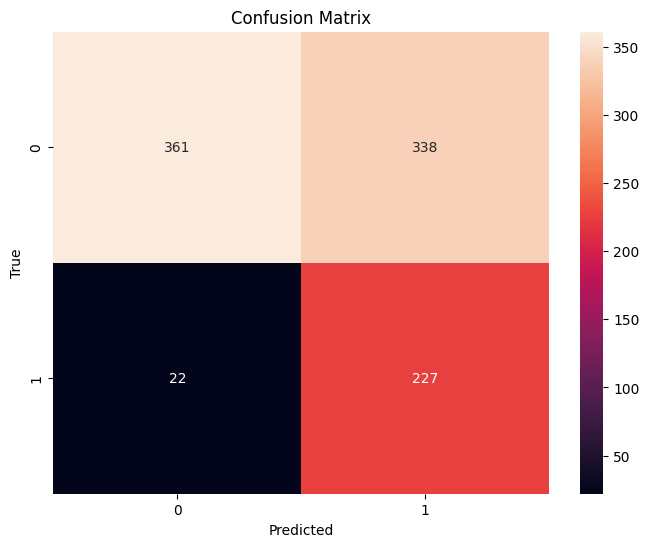

In [40]:
print(accuracy_score(y_test, y_pred_catboost))
# Plotar matriz de confusão
cm = confusion_matrix(y_test, y_pred_catboost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='rocket', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.gca().set_facecolor('black')
plt.show()

In [41]:
confusion_matrix(y_test, y_pred_catboost)

array([[361, 338],
       [ 22, 227]], dtype=int64)

In [42]:
import numpy as np
from sklearn.model_selection import cross_val_score


def calculate_bias_variance(model, X, y, num_trees_range, cv=5):
    # Lista para armazenar os valores de viés, variância e score médio
    bias_scores = []
    variance_scores = []
    mean_scores = []

    for num_trees in num_trees_range:
        # Definir o número de árvores no modelo
        model.set_params(iterations=num_trees)

        # Calcular os scores usando validação cruzada
        scores = cross_val_score(model, X, y, cv=cv, scoring='recall')

        # Calcular viés, variância e score médio
        mean_score = np.mean(scores)
        bias_score = (1 - mean_score)**2
        variance_score = np.var(scores)

        # Adicionar os valores às listas
        mean_scores.append(mean_score)
        bias_scores.append(bias_score)
        variance_scores.append(variance_score)

    return mean_scores, bias_scores, variance_scores


In [43]:
# Definir a faixa de números de árvores
num_trees_range = [10, 50, 100, 200, 300]

# Calcular viés e variância
mean_scores, bias_scores, variance_scores = calculate_bias_variance(catboost, X_train, y_train, num_trees_range)


In [44]:
print(mean_scores, bias_scores, variance_scores)

[0.46933668341708545, 0.47540703517587934, 0.4804120603015075, 0.47136683417085423, 0.48240703517587935] [0.2816035555667786, 0.2751977787429611, 0.2699716270801243, 0.27945302401454514, 0.2679024772354234] [0.002376520946440748, 0.0005289486124087769, 0.0008809819449003811, 0.0008301511577990455, 0.0011232803212040097]


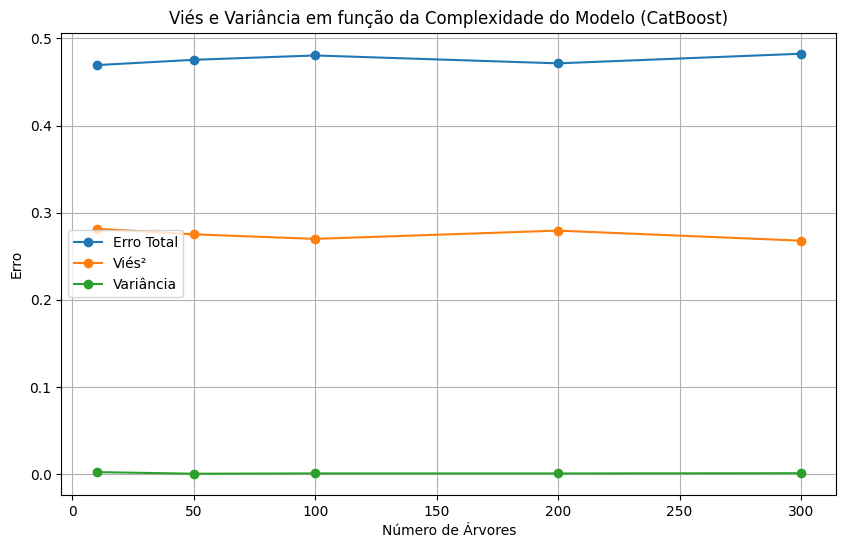

In [45]:
# Plotar o gráfico de viés e variância em função da complexidade do modelo
plt.figure(figsize=(10, 6))
plt.plot(num_trees_range, mean_scores, label='Erro Total', marker='o')
plt.plot(num_trees_range, bias_scores, label='Viés²', marker='o')
plt.plot(num_trees_range, variance_scores, label='Variância', marker='o')
plt.title('Viés e Variância em função da Complexidade do Modelo (CatBoost)')
plt.xlabel('Número de Árvores')
plt.ylabel('Erro')
plt.legend()
plt.grid(True)
plt.show()


Erro Total: O erro total do modelo parece aumentar ligeiramente à medida que o número de árvores aumenta. Isso pode indicar que o modelo está começando a sofrer de overfitting à medida que se torna mais complexo.

Viés² (Bias): O viés do modelo parece diminuir à medida que o número de árvores aumenta, o que é uma indicação positiva. Isso sugere que o modelo está se ajustando melhor aos dados de treinamento à medida que se torna mais complexo.

Variância: A variância do modelo parece relativamente estável à medida que o número de árvores aumenta. Isso indica que o modelo não está sofrendo drasticamente de overfitting devido à alta complexidade.

Vou manter a complexidade igual a 100 mesmo, ja que mais que isso ele vai overfitar com certeza, mas no geral acho que esta bom

Aqui foi a decisão que concertou o modelo, achar o melhor threshhold para o melhor f1-score, o f1-score é a media harmonica do precision x recall, achar o melhor f1-score nos ajuda a ter um modelo que nao perca muito clientes no falso negativo, e nem jogue todo mundo pro falso positivo

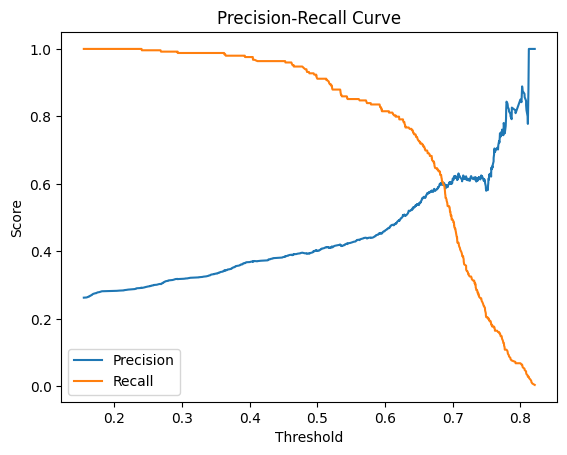

Best Threshold: 0.6622235260050187
Best F1-score: 0.6292947558770343


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, f1_score

# Calcular as probabilidades previstas
y_probs = best_catboost.predict_proba(X_test)[:, 1]

# Calcular a precisão e o recall para vários limiares
precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

# Calcular o F1-score para cada limiar
f1_scores = 2 * (precisions * recalls) / (precisions + recalls)

# Encontrar o limiar que maximiza o F1-score
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1_score = np.max(f1_scores)

# Plotar a curva de precisão-recall
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision-Recall Curve')
plt.show()

# Imprimir o limiar ideal e o F1-score correspondente
print(f"Best Threshold: {best_threshold}")
print(f"Best F1-score: {best_f1_score}")


CatBoost com melhores hiperparâmetros (com limiar ajustado):
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       699
           1       0.57      0.70      0.63       249

    accuracy                           0.78       948
   macro avg       0.73      0.76      0.74       948
weighted avg       0.80      0.78      0.79       948



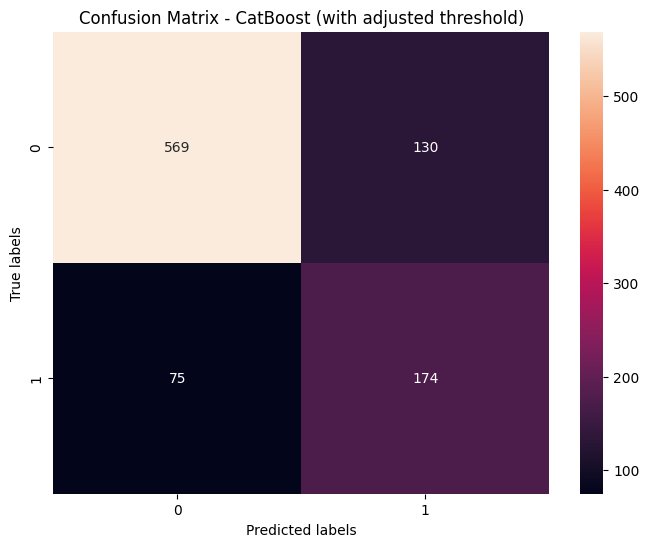

In [47]:
# Aplicar o limiar às probabilidades previstas
threshold = 0.6622
y_pred_proba = best_catboost.predict_proba(X_test)[:, 1]
y_pred_thresh = (y_pred_proba >= threshold).astype(int)

# Avaliar o modelo com o novo limiar
print("CatBoost com melhores hiperparâmetros (com limiar ajustado):")
print(classification_report(y_test, y_pred_thresh))

# Imprimir matriz de confusão com o heatmap do seaborn
conf_matrix = confusion_matrix(y_test, y_pred_thresh)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="rocket", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - CatBoost (with adjusted threshold)')
plt.show()


Modelo Final

CatBoost com melhores hiperparâmetros (com limiar ajustado):
              precision    recall  f1-score   support

           0       0.88      0.81      0.85       699
           1       0.57      0.70      0.63       249

    accuracy                           0.78       948
   macro avg       0.73      0.76      0.74       948
weighted avg       0.80      0.78      0.79       948



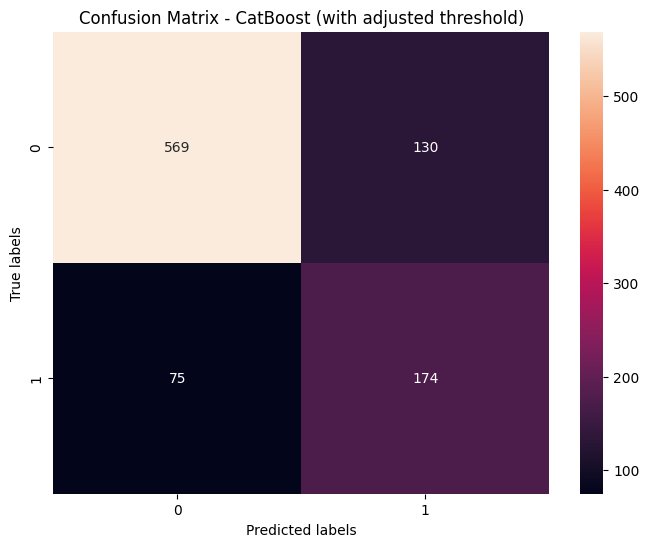

In [48]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Definir uma função de predição personalizada com o limiar ajustado
def predict_with_threshold(model, X, threshold):
    # Obter as probabilidades previstas pelo modelo
    y_prob = model.predict_proba(X)[:, 1]
    # Aplicar o limiar aos resultados das probabilidades previstas
    y_pred_thresh = (y_prob >= threshold).astype(int)
    return y_pred_thresh

# Instanciar e treinar o modelo CatBoost com os melhores hiperparâmetros
best_catboost = CatBoostClassifier(depth=4, iterations=100, learning_rate=0.01, scale_pos_weight=5, verbose=0)
best_catboost.fit(X_train, y_train)

# Aplicar o limiar aos resultados das probabilidades previstas
threshold = 0.6622
# Fazer a predição com o limiar ajustado
y_pred_thresh = predict_with_threshold(best_catboost, X_test, threshold)

# Salvar o modelo treinado
best_catboost.save_model("catboost_model_with_threshold")

# Avaliar o modelo com o novo limiar
print("CatBoost com melhores hiperparâmetros (com limiar ajustado):")
print(classification_report(y_test, y_pred_thresh))

# Imprimir matriz de confusão com o heatmap do seaborn
conf_matrix = confusion_matrix(y_test, y_pred_thresh)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="rocket", fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - CatBoost (with adjusted threshold)')
plt.show()


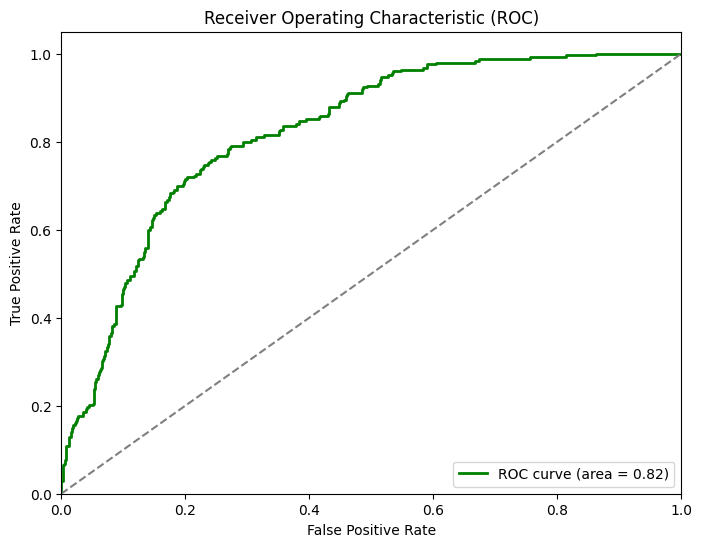

In [54]:
from sklearn.metrics import roc_curve, auc

# Definir uma função para plotar a curva ROC
def plot_roc_curve(model, X, y):
    # Obter as probabilidades previstas pelo modelo
    y_prob = model.predict_proba(X)[:, 1]
    # Calcular a taxa de falsos positivos (fpr) e a taxa de verdadeiros positivos (tpr)
    fpr, tpr, thresholds = roc_curve(y, y_prob)
    # Calcular a área sob a curva (AUC)
    roc_auc = auc(fpr, tpr)
    
    # Plotar a curva ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='green', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

# Plotar a curva ROC e calcular a AUC
plot_roc_curve(best_catboost, X_test, y_test)


Análise de Overfitting x Underfitting x Goodfitting

No começo o modelo não estava overfitando nem underfitando, mas estava com um recall e um precision muito baixo, apos o thresholdind o modelo ficou descente, com base nesses resultados, podemos concluir que o CatBoost tem um desempenho razoável com uma boa precisão e recall. No entanto, ainda há espaço para melhorias, especialmente no recall, que pode ser importante para identificar corretamente mais clientes propensos a cancelar o serviço.

Ainda tem coisa pra melhorar